In [37]:
from src.class_polygon import Polygon
from src.smth2matrix.shift2zero import shift2zero
import numpy as np
from src.greedy_alg.class_pallets import Pallets
from src.class_item import Item

from copy import copy
import math

from src.class_packing import Packing
from src.smth2lines.polygon2segments import polygon2segments

h = 1

width = 100
height = 100

path = 'concave15/test22.txt'
f = open(path, 'r')
num_items = int(f.readline())
polygons = np.full(num_items, None)
list_pallet_shape = f.readline().split(' ')
for i in range(num_items):
    list_points = f.readline().split(' ')
    points = []
    for j in range(0, len(list_points) - 1, 2):
        point = [float(list_points[j]), float(list_points[j + 1])]
        points.append(point)
    if (points[0][0] == points[-1][0] and points[0][1] == points[-1][1]):
        points.pop()
    polygons[i] = np.array(points)
f.close()


packing = Packing(width=width, height=height, drill_radius=0)

packing.polygons = copy(polygons)
packing.num_items = len(polygons)

pallets = Pallets([width, height])
pallets.grid_step = h
pallets.add_pallet_lines()

print(pallets.pallet_lines)

[[[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], [100, 100]], [[0, 0], 

In [38]:
packing.items = np.full(len(polygons), None)

for id in range(len(polygons)):
    item = Item(id, polygons[id])
    packing.items[id] = item
    item.rotation = 0

packing.pallets = pallets
packing.h = h
packing.add_segments_for_items()

In [39]:
packing.set_squares()

packing.sort_items(num_sort=2)

In [40]:
def pack_item(item, pallets, t_vector, r, best_rotation):
    item.t_vector = [t_vector, r]
    item.packed = True
    item.best_rotation = best_rotation
    for s in range(len(item.segments[best_rotation])):
        for l in range(len(item.segments[best_rotation][s])):
            new_line = [copy(item.segments[best_rotation][s][l][0]) + copy(item.t_vector[0]), copy(item.segments[best_rotation][s][l][1]) + copy(item.t_vector[0])]
            pallets.pallet_lines[r+s].append(copy(new_line))
        pallets.pallet_lines[r+s].sort(key=lambda x: int(x[0]), reverse=False)

    def first_elem(e):
      return e[0]

    for line in pallets.pallet_lines:
        for segment in line:
            segment.sort()
        line.sort(key=first_elem)
        i = 0
        while i < (len(line) - 1):
            if line[i][1] == line[i+1][0]:
                line[i][1] = line[i+1][1]
                line.pop(i+1)
                continue
            if line[i][1] > line[i+1][0]:
                if line[i][1] < line[i+1][1]:
                    line[i][1] = line[i+1][1]
                    line.pop(i+1)
                    continue
                elif line[i][1] >= line[i+1][1]:
                    line.pop(i+1)
                    continue
            i+=1

def pack_segments(items, pallets):
    for item in items:
        best_height = 10000
        best_t_vector = None
        best_rotation = None
        best_r = None
        for rotation in range(item.rotation + 1):
            segments = copy(item.segments[rotation])
            r = 0
            finish_flag = 0
            while r < len(pallets.pallet_lines) and item.packed == False and finish_flag == 0:
                row = pallets.pallet_lines[r]
                k = 1
                ex_flag = 0
                while k < len(row) and item.packed == False and ex_flag == 0:
                    t_vector = row[k-1][1] - segments[0][0][0]
                    i = 0
                    # l = len(segments[0])
                    while i < len(segments) and r + i < len(pallets.pallet_lines) and ex_flag == 0:
                            j = 0
                            while j < len(segments[i]) and ex_flag == 0:
                                m = 0
                                while m < len(pallets.pallet_lines[r+i]) and ex_flag == 0:
                                    # случаи пересечения линии и упаковки
                                    if segments[i][j][1] + t_vector > pallets.shape[0]:
                                        ex_flag = 1
                                    elif pallets.pallet_lines[r+i][m][0] <= segments[i][j][0] + t_vector < pallets.pallet_lines[r+i][m][1] and segments[i][j][0] + t_vector != segments[i][j][1] + t_vector:
                                        t_vector = pallets.pallet_lines[r+i][m][1]
                                        i = 0
                                        j = 0
                                    elif pallets.pallet_lines[r+i][m][0] < segments[i][j][1] + t_vector <= pallets.pallet_lines[r+i][m][1] and segments[i][j][0] + t_vector != segments[i][j][1] + t_vector:
                                        t_vector = pallets.pallet_lines[r+i][m][1]
                                        i = 0
                                        j = 0
                                    elif segments[i][j][0] + t_vector < pallets.pallet_lines[r + i][m][0] and \
                                            pallets.pallet_lines[r + i][m][1] < segments[i][j][1] + t_vector:
                                        t_vector = pallets.pallet_lines[r + i][m][1]
                                        i = 0
                                        j = 0
                                    elif segments[i][j][0] + t_vector < 0:
                                        t_vector = - segments[i][j][0]
                                        i = 0
                                        j = 0

                                    m += 1
                                j += 1
                            i += 1
                    # если объект влезает, сохраняем его координаты
                    if ex_flag == 0:
                        # pack_item(item, pallets, t_vector, r)
                        if best_height > r :
                            best_height = copy(r)
                            best_r = copy(r)
                            best_t_vector = copy(t_vector)
                            best_rotation = copy(rotation)
                        finish_flag = 1
                        ex_flag = 1
                    k += 1
                r += 1
        pack_item(item, pallets, best_t_vector, best_r, best_rotation)

pack_segments(packing.items, packing.pallets)


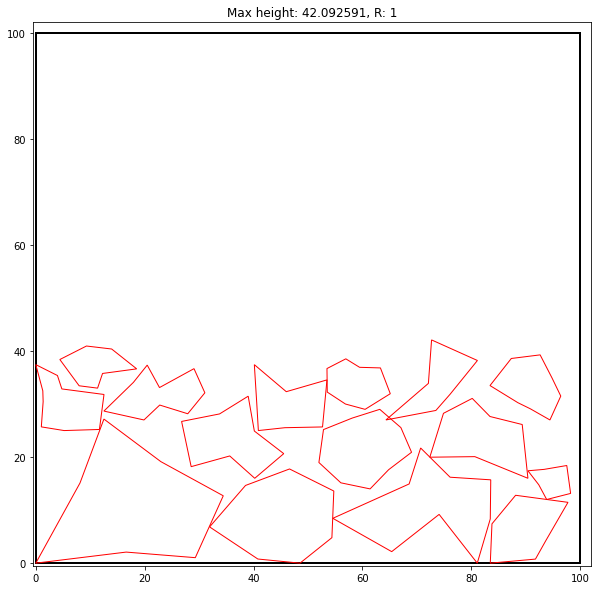

In [41]:
from src.class_vector import Vector
import random
from matplotlib import pyplot as plt, patches

pallet_width = width
pallet_height = height

fig, ax = plt.subplots()

MAX_SIZE = 10
if pallet_width > pallet_height:
    fig.set_figheight(MAX_SIZE)
    fig.set_figwidth(
        MAX_SIZE * pallet_width/pallet_height)
else:
    fig.set_figheight(
        MAX_SIZE * pallet_height/pallet_width)
    fig.set_figwidth(MAX_SIZE)

pallet = patches.Rectangle((0, 0),
                            pallet_width,
                            pallet_height,
                            linewidth=2,
                            facecolor='none',
                            edgecolor='black')
ax.add_patch(pallet)
ax.set_xlim(-0.5, pallet_width + 2)
ax.set_ylim(-0.5, pallet_height + 2)

# for i in range(int(pallet_height/h)):
#     plt.plot([0, pallet_width], [i*h, i*h], linestyle = 'dotted', color = 'black')

# h = 1
max_height = 0

for polygon in packing.items:

    rotated_points = copy(polygon.points)
    new_points = Polygon(rotated_points)
    t_vec = copy(polygon.t_vector)
    t_v = Vector(t_vec[0], t_vec[1])
    new_points.move_to(t_v)
    rotated_points = new_points.points_to_list()
    for r_point in rotated_points:
        if r_point[1] > max_height:
                    max_height = copy(r_point[1])

    figure = patches.Polygon(rotated_points,
                            linewidth=1,
                            edgecolor='red',
                            fill=False)
    ax.add_patch(figure)
    # random_color = "#" + \
    #                 ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    # print(rot)
    # for i in range(len(polygon.segments[rot])):
    #     for sigment in polygon.segments[rot][i]:
    #         sigment[0]+=polygon.t_vector[0]
    #         sigment[1]+=polygon.t_vector[0]
    #         if sigment[0] != sigment[1]:
    #             plt.plot(sigment, [(i+polygon.t_vector[1])*h, (i+polygon.t_vector[1])*h], color = random_color, alpha=0.7)
    #         else:
    #             ax.scatter(sigment[0], (i+polygon.t_vector[1])*h, color = random_color, s = 4, alpha=0.7)
plt.title('Max height: ' + str(max_height) + ', R: ' + str(packing.h))
# plt.savefig('line-packing.png')
plt.show()

In [42]:
# packing.draw_segments_packing()